<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/Facial_Expression_recognition_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [3]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip

--2022-07-28 10:15:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘happy-or-sad.zip’

happy-or-sad.zip    100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2022-07-28 10:15:46 (206 MB/s) - ‘happy-or-sad.zip’ saved [2670333/2670333]



In [4]:
import zipfile

In [7]:
local_zip = '/content/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('happy-sad')

In [8]:
train_happy_dir = os.path.join('/content/happy-sad/happy')

In [9]:
train_sad_dir = os.path.join('/content/happy-sad/sad')

In [12]:
train_happy_items = os.listdir(train_happy_dir)
train_sad_items = os.listdir(train_sad_dir)

In [11]:
len(train_happy_items)

40

In [13]:
print(len(train_sad_items))

40


In [20]:
items = []
for item in enumerate(train_happy_items):
  items.append(np.array(item))




In [22]:
from tensorflow.keras.preprocessing.image import load_img

Sample happy image:


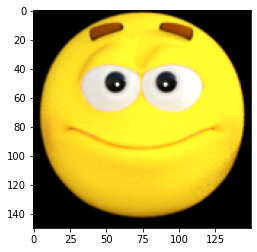


Sample sad image:


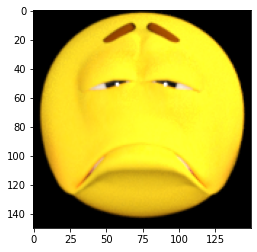

In [29]:
print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(train_sad_dir, os.listdir(train_sad_dir)[0])}"))
plt.show()

In [31]:
from tensorflow.keras.preprocessing.image import img_to_array

In [33]:
img = load_img(f"{os.path.join(train_happy_dir, os.listdir(train_happy_dir)[0])}")

In [34]:
img_array = img_to_array(img)

In [35]:
img_array.shape

(150, 150, 3)

In [36]:
class callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.979:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def image_